# Project: Unsupervised Learning: Trade & Ahead

## Problem Statement
The data analytics challenge asks to perform unsupervised machine learning based cluster analysis for identifying stocks that exhibit similar characteristics and the ones which exhibit minimum correlation. This developed model will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Context:
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. So, we need a better way of reviewing and analyzing stocks in the market.

Trade&Ahead, a financial consultancy, specialized in providing personalized investment strategies seeking to learn insights about stock categories in the Market through a developed machine learning model

# Objective
To preprocess the raw data, analyze it, and build a unsupervised Machine Learning model to:

Cluster various companies stocks as per their characteristics.
Recommend actionable insights and business recommedations based on the clustered data

# Data Description
The data comprises stock prices' and some financial indicators for a few companies listed under the New York Stock Exchange. The detailed data dictionary is given below.

1. Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
2. Security: Name of the company
3. GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
4. GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
5. Current Price: Current stock price in dollars
6. Price Change: Percentage change in the stock price in 13 weeks
7. Volatility: Standard deviation of the stock price over the past 13 weeks
8. ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
9. Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
10. Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
11. Net Income: Revenues minus expenses, interest, and taxes (in dollars)
12. Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
13. Estimated Shares Outstanding: Company's stock currently held by all its shareholders
14. P/E Ratio: Ratio of the company's current stock price to the earnings per share
15. P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

# Importing libraries and data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
import pandas as pd

In [3]:
# code to import the data
data = pd.read_csv(r'C:\Users\ayub\Downloads\stock_data.csv')

# Data Overview

Sanity checks

In [4]:
# Checking the number of rows and columns in the training data
data.shape

(340, 15)

In [5]:
#check the size of the data
data.size

5100

In [7]:
#sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [8]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [9]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

# Exploratory Data Analysis (EDA)

1. EDA is an important part of any project involving data.
2. It is important to investigate and understand the data better before building  a model with it.
3. A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
4. A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Questions:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [12]:
# let's view the statistical summary of the numerical columns in the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    

### Plotting histograms and boxplots for all continuous variables

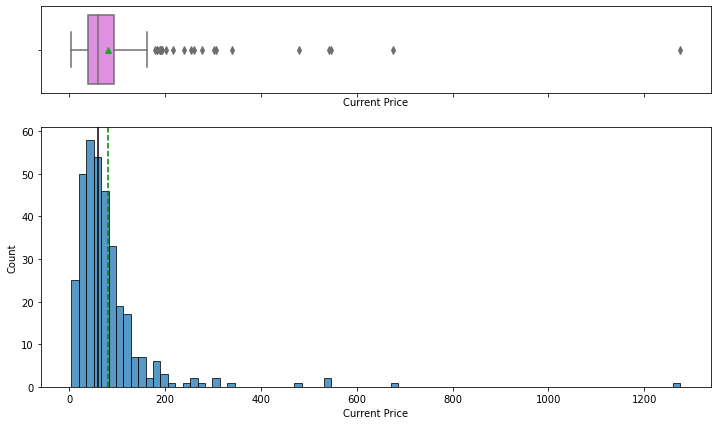

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
histogram_boxplot(df, 'Current Price')

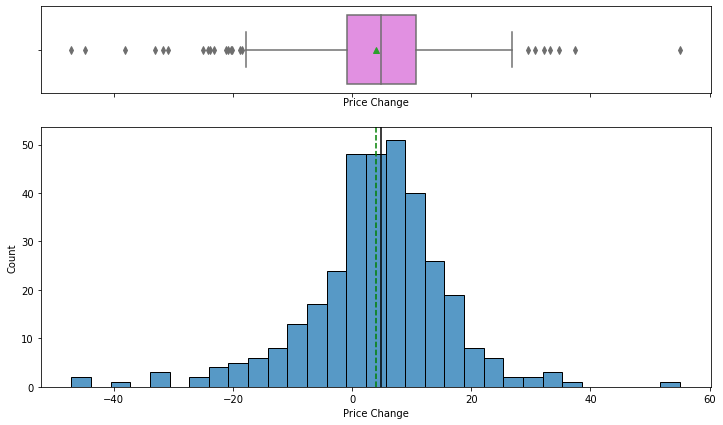

In [21]:
histogram_boxplot(df, 'Price Change')

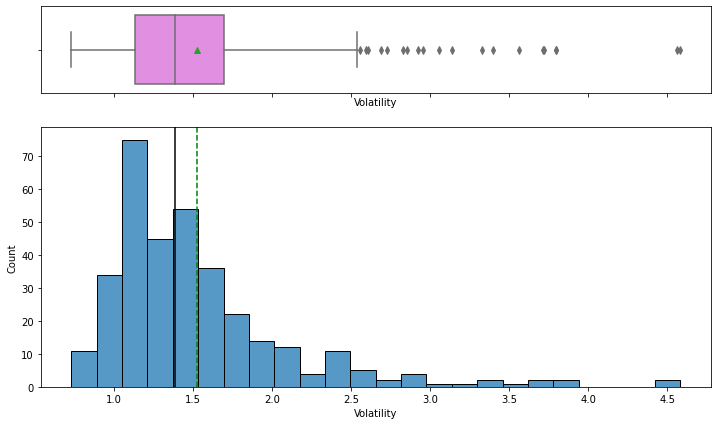

In [22]:
histogram_boxplot(df, 'Volatility')

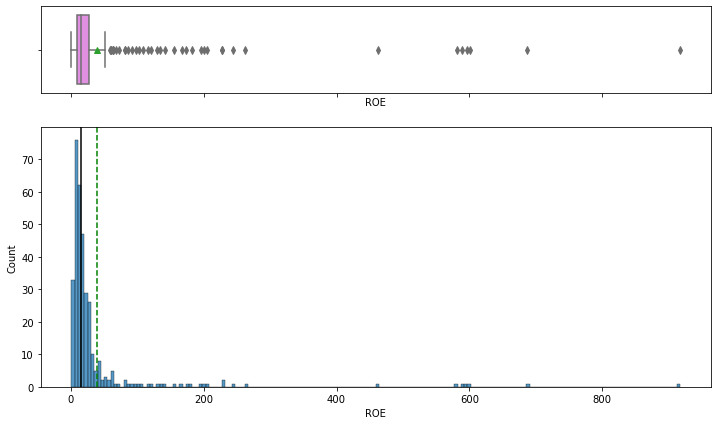

In [24]:
histogram_boxplot(df, 'ROE')

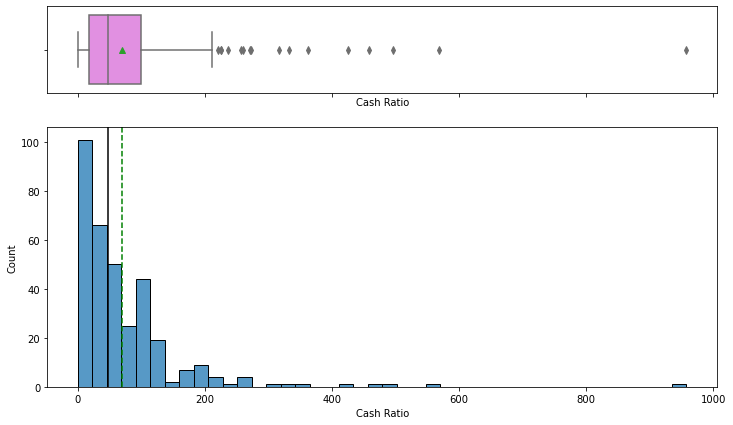

In [25]:
histogram_boxplot(df, 'Cash Ratio')

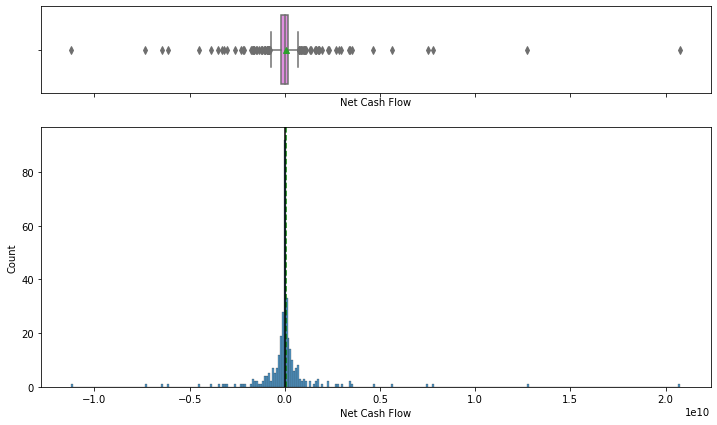

In [26]:
histogram_boxplot(df, 'Net Cash Flow')

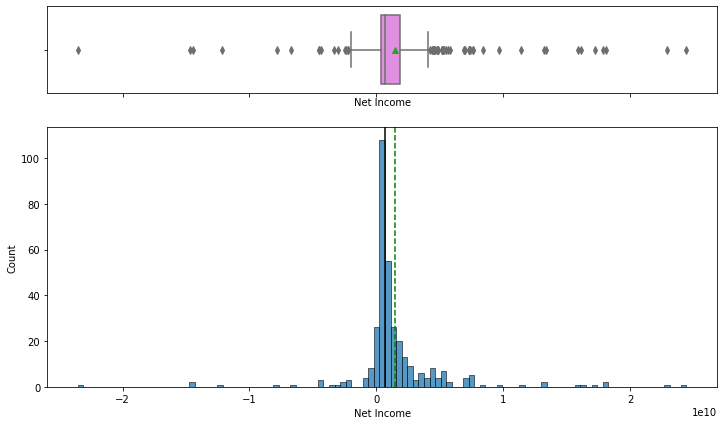

In [27]:
histogram_boxplot(df, 'Net Income')

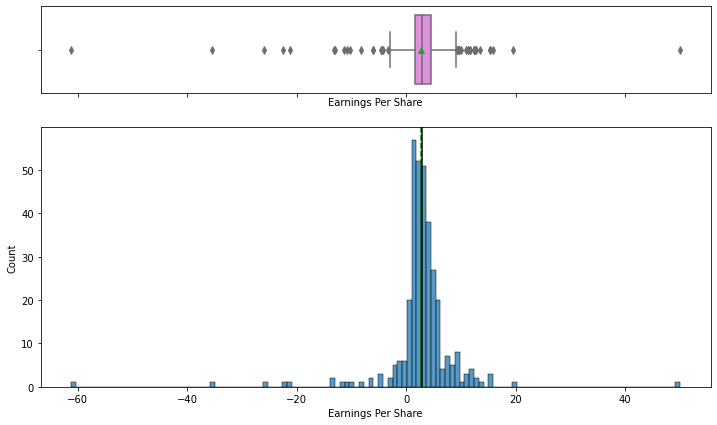

In [28]:
histogram_boxplot(df, 'Earnings Per Share')


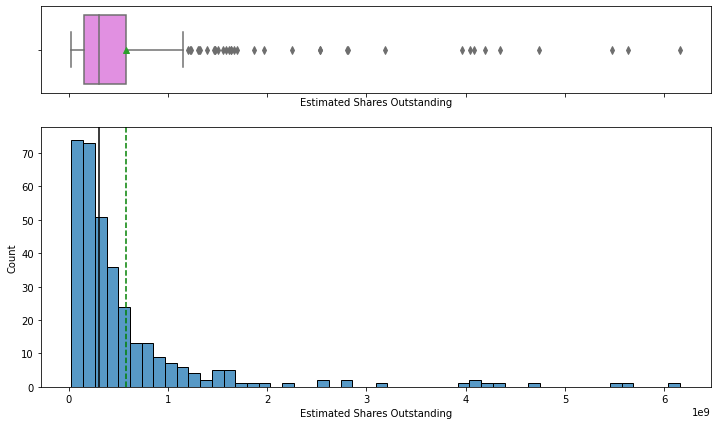

In [29]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

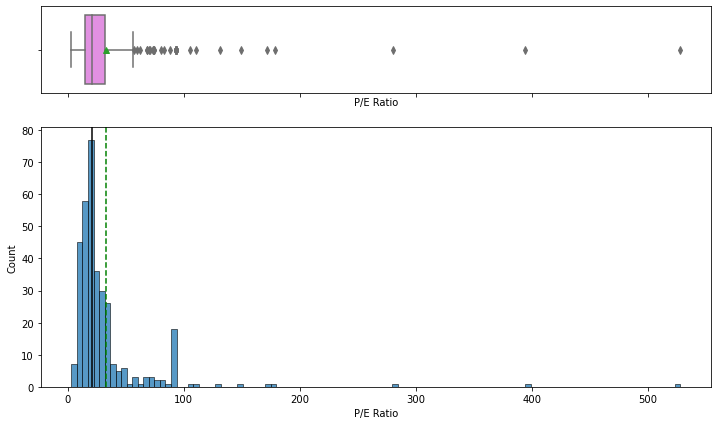

In [30]:
histogram_boxplot(df, 'P/E Ratio')

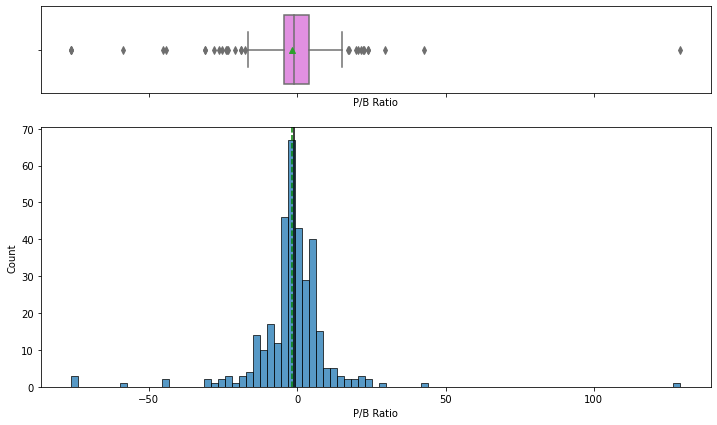

In [31]:
histogram_boxplot(df, 'P/B Ratio')

In [32]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

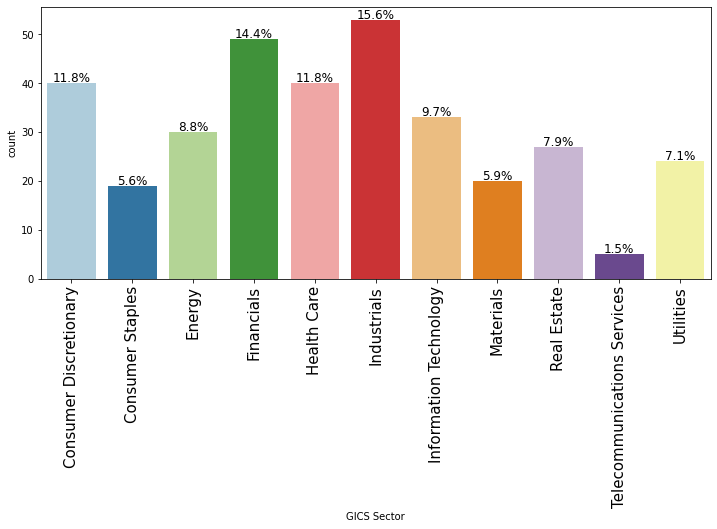

In [33]:
labeled_barplot(df, 'GICS Sector', perc=True)


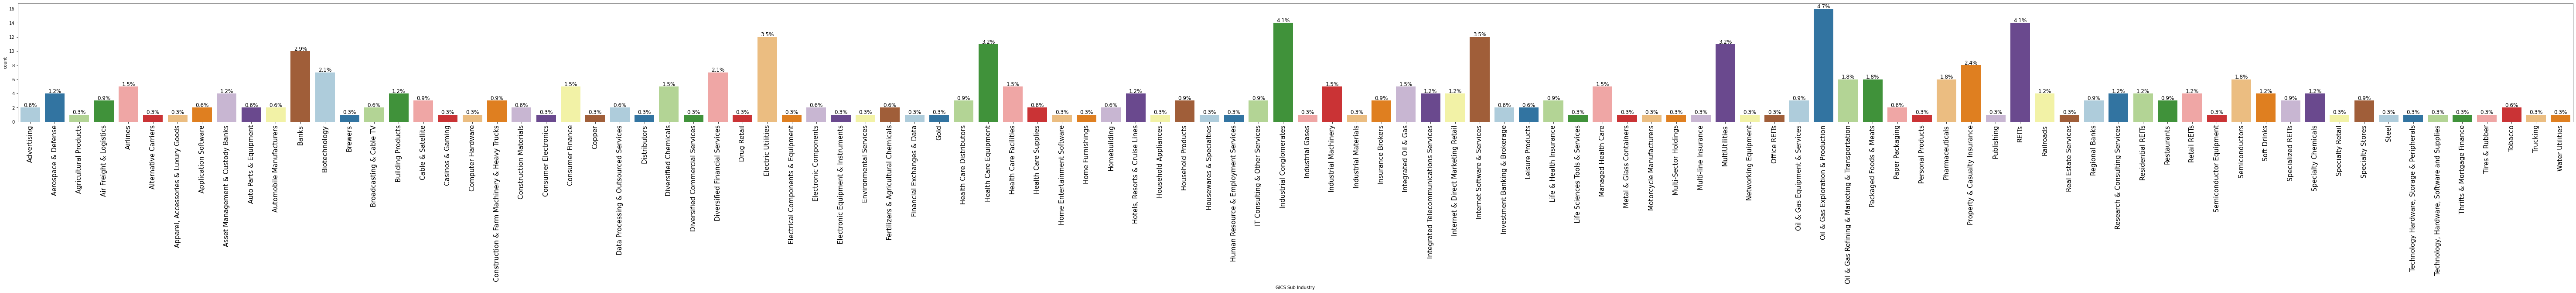

In [34]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

## Bivariate Analysis

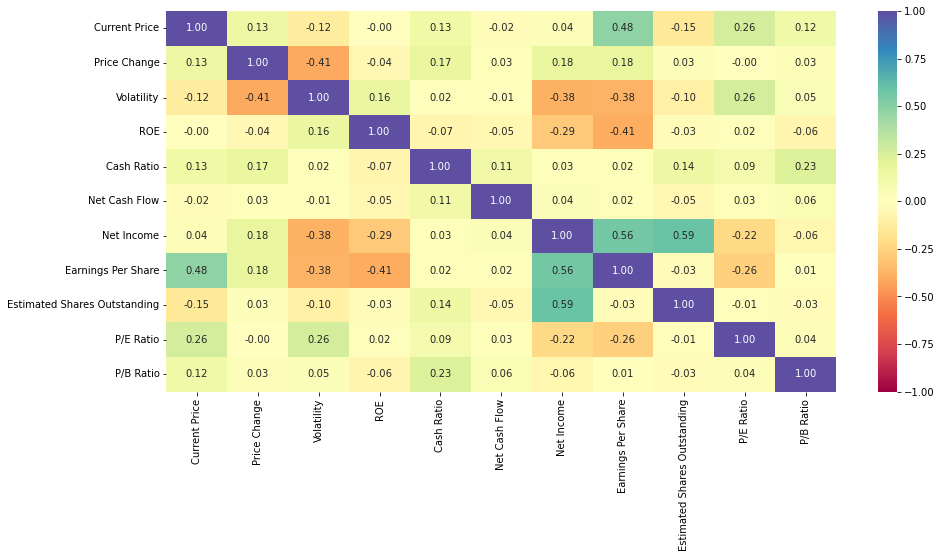

In [35]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


## Check the stocks of which economic sector have seen the maximum price increase on average.

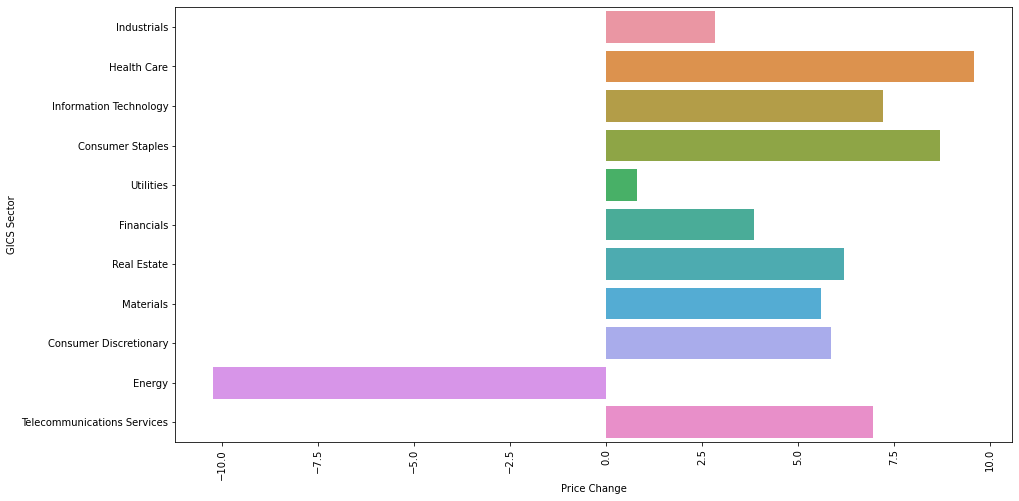

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Price Change', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.

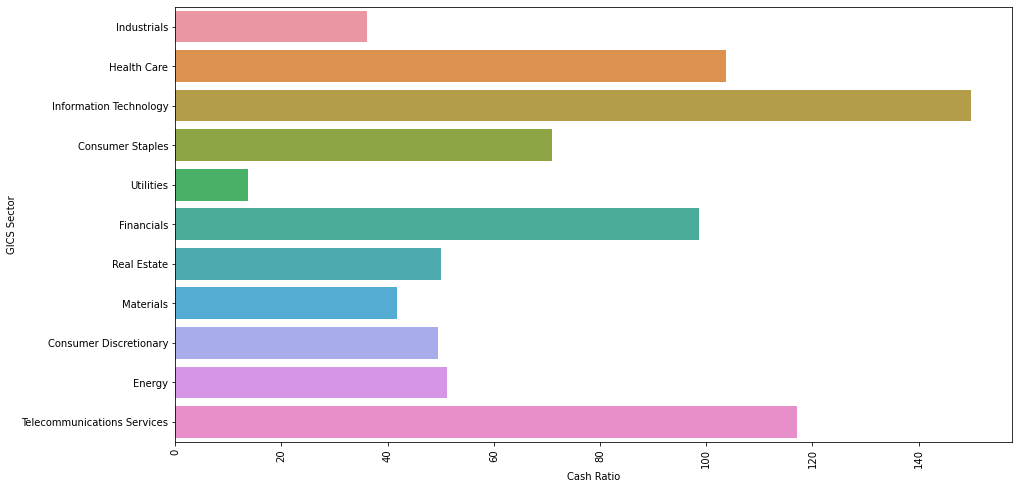

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.

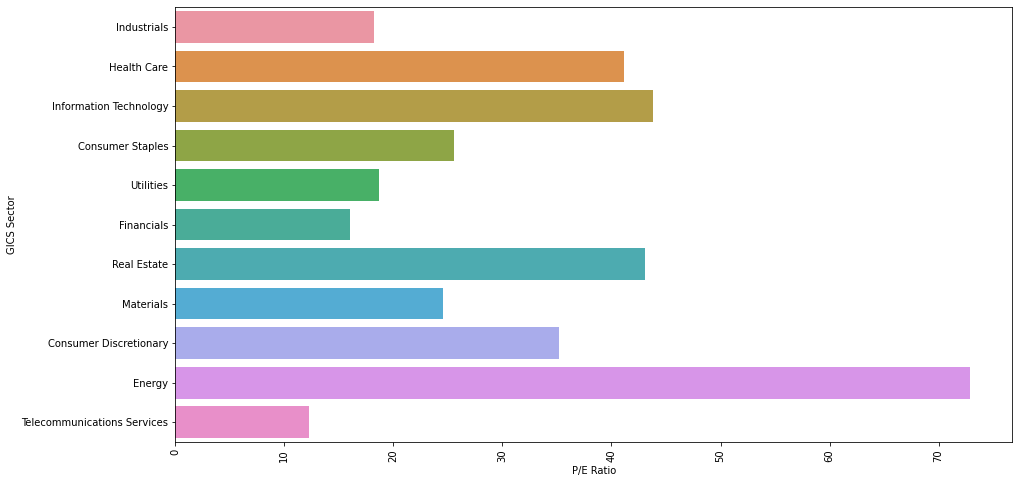

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.

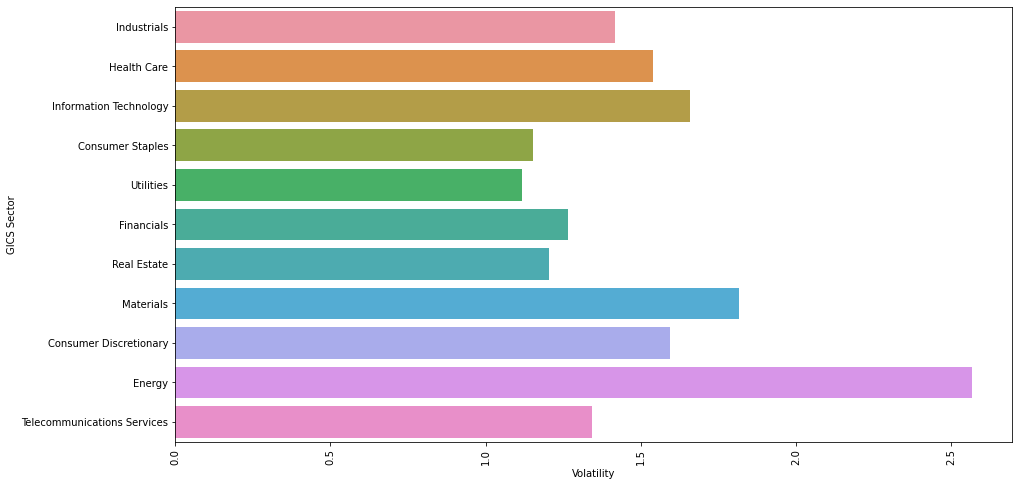

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Volatility', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing
1. Duplicate value check
2. Missing value treatment
3. Outlier check
4. Scaling the data

In [40]:
# let's check for duplicate values in the data
df.groupby(df.duplicated(subset=None, keep="first"), as_index=False).size()

,index,size
0,False,340


In [41]:
# let's check for missing values in the data
df.isnull().sum()
print(" \nCount total NaN (or) Missing values : \n\n", df.isnull().sum())

 
Count total NaN (or) Missing values : 

 Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


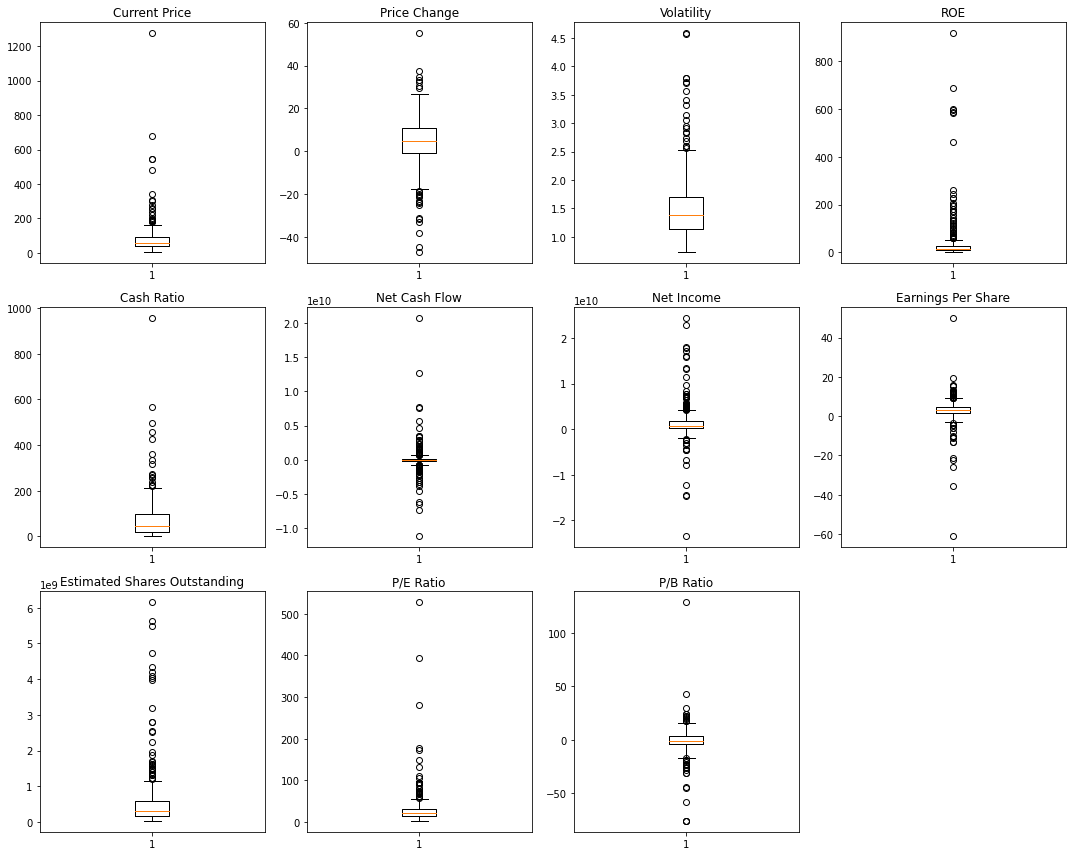

In [43]:
#Outlier Check
# outlier detection using boxplot
import numpy as np
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))
for i, parameter in enumerate(numeric_columns):
    plt.subplot(3,4, i+1)
    plt.boxplot(data[parameter], whis=1.5)
    plt.tight_layout()
    plt.title(parameter)

plt.show()

In [45]:
# scaling the data before clustering

# selecting numerical columns
from sklearn.preprocessing import StandardScaler
num_col = df.select_dtypes(include=np.number).columns.tolist()

# scaling
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## EDA
It is a good idea to explore the data once again after manipulating it.

In [46]:
# let's view the statistical summary of the numerical columns in the data
subset_scaled_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,1.453086e-17,1.001474,-0.779918,-0.432101,-0.216088,0.122741,12.195670
Price Change,340.0,-1.502066e-17,1.001474,-4.271357,-0.418535,0.061834,0.551963,4.251806
Volatility,340.0,-6.587868e-17,1.001474,-1.341642,-0.661838,-0.237564,0.286960,5.168258
ROE,340.0,2.873518e-17,1.001474,-0.400362,-0.309599,-0.255142,-0.130667,9.101176
Cash Ratio,340.0,-8.196058e-17,1.001474,-0.775555,-0.576194,-0.255000,0.320933,9.834905
Net Cash Flow,340.0,-7.224613e-18,1.001474,-5.795489,-0.128348,-0.027497,0.058798,10.655237
Net Income,340.0,6.040919e-18,1.001474,-6.359977,-0.290285,-0.200045,0.102842,5.832629
Earnings Per Share,340.0,4.555180e-17,1.001474,-9.725729,-0.185337,0.017990,0.280224,7.192572
Estimated Shares Outstanding,340.0,-1.244511e-16,1.001474,-0.650430,-0.495119,-0.316542,-0.004630,6.609320
P/E Ratio,340.0,1.665335e-17,1.001474,-0.670162,-0.396715,-0.266300,-0.019145,11.187619


## K-means Clustering

In [47]:
k_means_df = subset_scaled_df.copy()

C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 2 	Average Distortion: 2.382318498894466


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 3 	Average Distortion: 2.2692367155390745


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 4 	Average Distortion: 2.1745559827866363


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 5 	Average Distortion: 2.128799332840716


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 6 	Average Distortion: 2.080400099226289


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 7 	Average Distortion: 2.0289794220177395


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 8 	Average Distortion: 1.964144163389972


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 9 	Average Distortion: 1.9221492045198068


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 10 	Average Distortion: 1.8513913649973124


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 11 	Average Distortion: 1.8024134734578485


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 12 	Average Distortion: 1.7900931879652673


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 13 	Average Distortion: 1.7417609203336912


C:\Users\ayub\anaconda34\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 14 	Average Distortion: 1.673559857259703


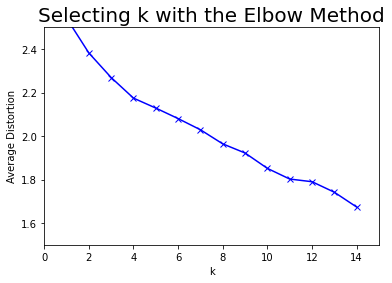

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlim([0, 15])
plt.ylim([1.5, 2.5])
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

Appropriate value for k seems to be 4. However, 11 (or) 12 also looks like inflection points. With this ambiguity, we should use the Silhouette Method to determine the # of clusters

In [54]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

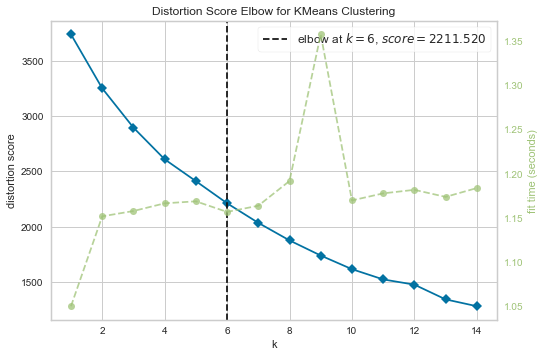

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


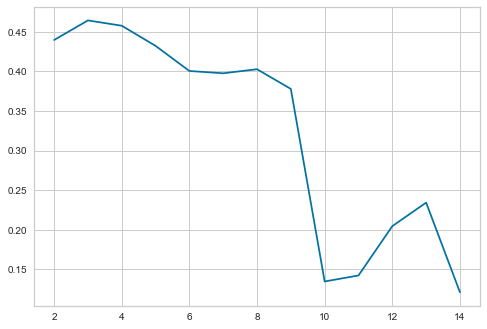

In [56]:
# Let's check the silhouette scores.

sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

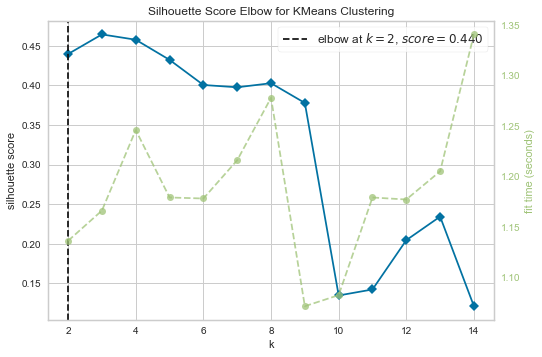

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

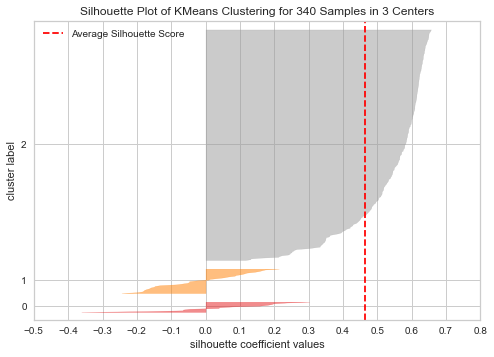

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# finding optimal no. of clusters with silhouette coefficients
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

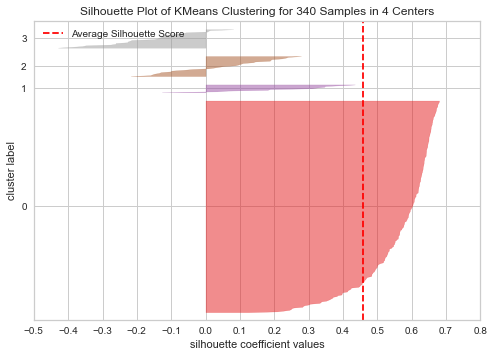

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

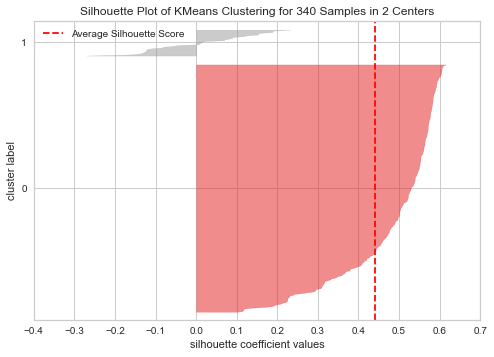

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.



In [62]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [63]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

## Cluster Profiles

In [64]:
## code to groupby the cluster labels
km_cluster_profile = df1.groupby("KM_segments").mean()  

In [65]:
## code to groupby the cluster labels
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [66]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [67]:
## code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [68]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

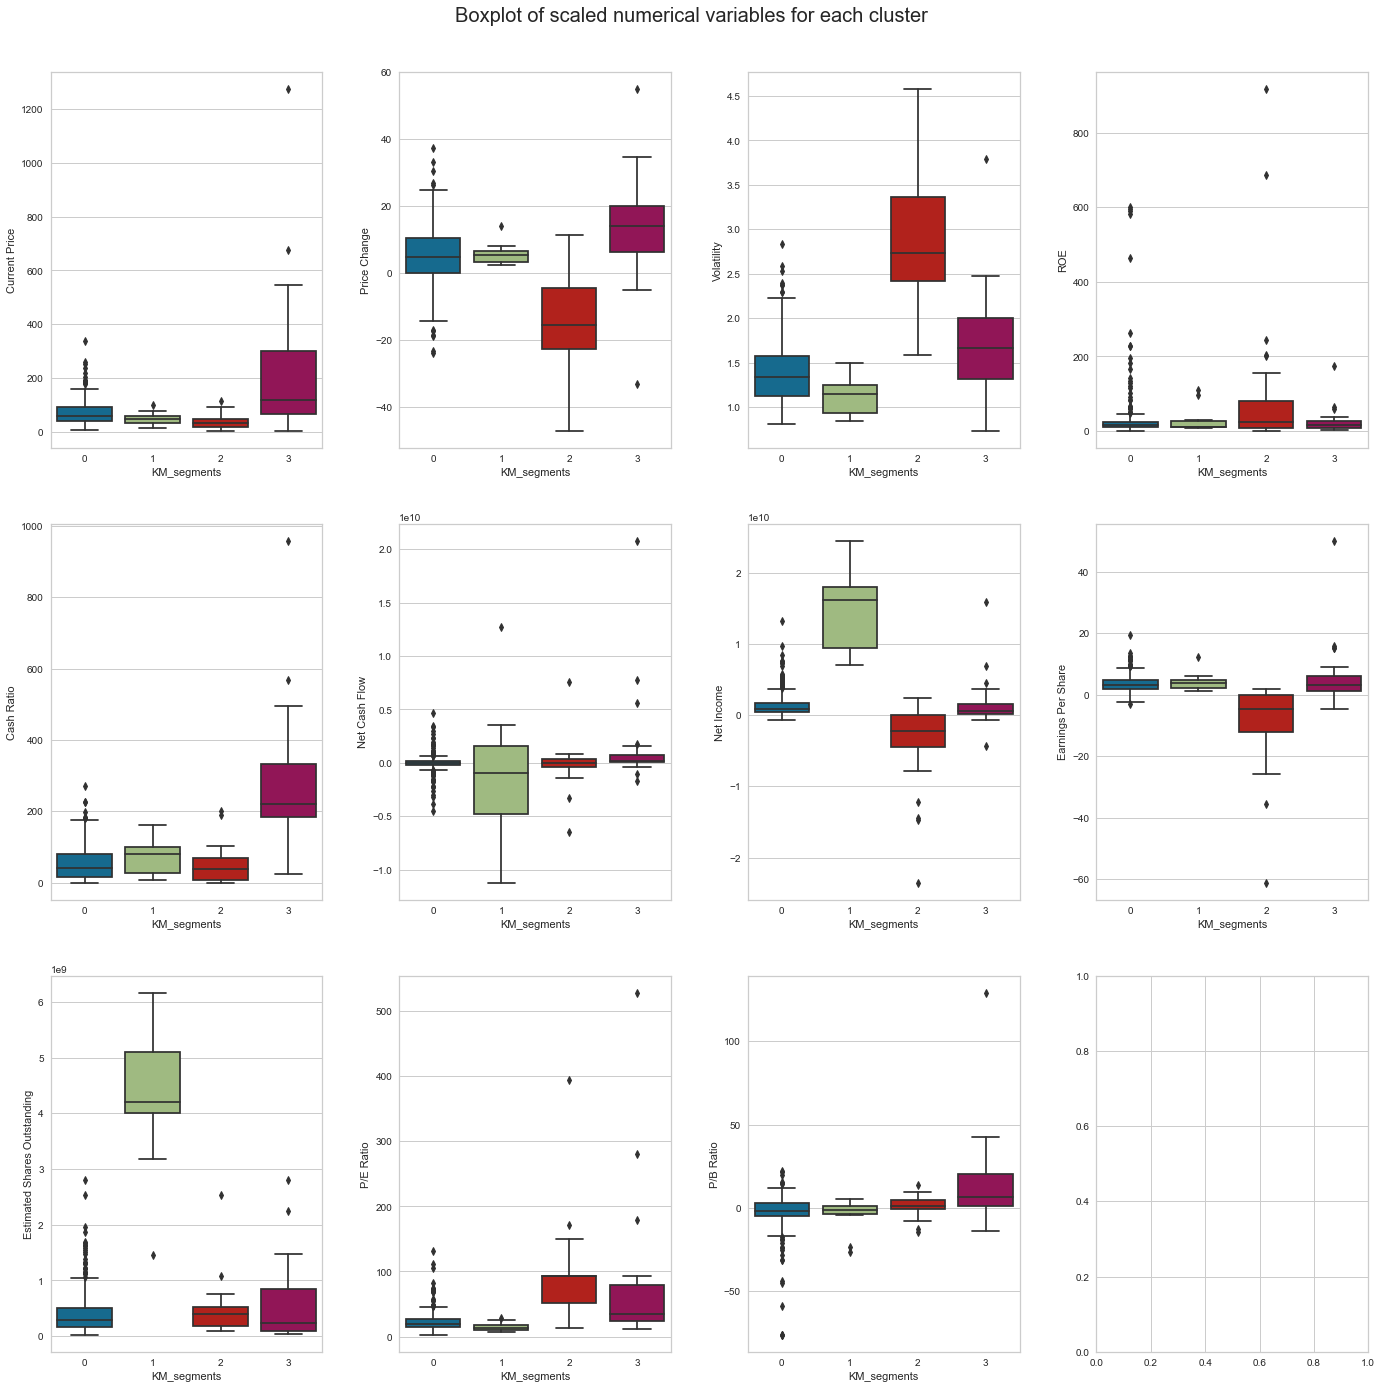

In [69]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Cluster 0:

1. The number of companies present in this cluster is the lowest in terms of count, companies are primarily from consumer discretionary and Health Care economic sectors
2. Average current stock prices are high in this cluster compared with other clusters
3. Avg. price change is also high in this cluster compared with other ones
4. Avg. volatilty is second highest in this cluster
5. Return of Equity (ROE) is the lowest in this cluster
6. Avg. cash ratio is the highest in this cluster
7. Net cash flow is the second highest in this cluster with few low and high outliers
8. Range of Net Income in this cluster is nearly close to zero, and there is not much variance in between the net income of various companies in this cluster
9. Avg. Earnings Per Share is the highest in this cluster, with one outlier value >40
10. Avg. Estimated Shares Outstanding is the lowest in this cluster
11. Avg. P/E Ratio is the highest in this cluster with one outlier
12. Avg. P/B Ratio is the highest in this cluster with one outlier


### Cluster 1:

1. The number of companies present in this cluster is the highest in terms of count, companies are primarily from Industrials, Financials, and Consumer Discretionary economic sectors
2. Average current stock price is the second highest in this cluster, with many high end outliers
3. Price change is from low to high with many outliers on both the ends
4. Avg. volatilty is third highest in this cluster, with many high end outliers
5. Return of Equity (ROE) is the second highest in this cluster, with many high end outliers
6. Avg. cash ratio is the second lowest in this cluster, with many high end outliers
7. Net cash flow is the second lowest in this cluster with many low end and high end outliers
8. Avg. Net Income is the second highest in this cluster with many high end outliers and very few low end outliers
9. Avg. Earnings Per Share is the second lowest in this cluster, with few low end and many high end outliers
10. Avg. Estimated Shares Outstanding is the second lowest in this cluster with many high end outliers
11. Avg. P/E Ratio is the second lowest in this cluster with many high end outliers
12. Avg. P/B Ratio is the second lowest in this cluster with many low end outliers


### Cluster 2:

1. The number of companies present in this cluster is the second lowest in terms of count, companies are primarily from Financials, and Health Care economic sectors
2. Average current stock price is the second lowest in this cluster
3. Avg. Price change is the second highest in this cluster
4. Avg. volatilty is second lowest in this cluster
5. Return of Equity (ROE) is the second lowest in this cluster, with few high end outliers
6. Avg. cash ratio is the second highest in this cluster
7. Net cash flow is the highest in this cluster with few low end and high end outliers
8. Avg. Net Income is the highest in this cluster
9. Avg. Earnings Per Share is the second highest in this cluster, with few high end outliers
10. Avg. Estimated Shares Outstanding is the highest in this cluster with high range and variance between datapoints
11. Avg. P/E Ratio is the lowest in this cluster with few high end outliers
12. Avg. P/B Ratio is the lowest in this cluster with few low end outliers


### Cluster 3:

1. The number of companies present in this cluster is the second highest in terms of count, companies are primarily from Energy economic sectors
2. Average current stock price is the lowest in this cluster with few high end outliers
3. Avg. Price change is the lowest in this cluster, with high range and variance
4. Avg. volatilty is highest in this cluster, with high range and variance
5. Avg. Return of Equity (ROE) is the highest in this cluster, with very few high end outliers and high range and variance
6. Avg. cash ratio is the lowest in this cluster, with very few high end outliers
7. Net cash flow is the lowest in this cluster with many low end and few high end outliers
8. Avg. Net Income is the lowest in this cluster with a few low end outliers
9. Avg. Earnings Per Share is the lowest in this cluster, with few high end outliers and high range and variance
10. Avg. Estimated Shares Outstanding is the second lowest in this cluster
11. Avg. P/E Ratio is the second highest in this cluster with few high end outliers
12. Avg. P/B Ratio is the second highest in this cluster with few low end outliers

In [77]:
import scipy
hc_df = subset_scaled_df.copy()
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

In [78]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

Exploring different linkage methods with Euclidean distance only.

In [79]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


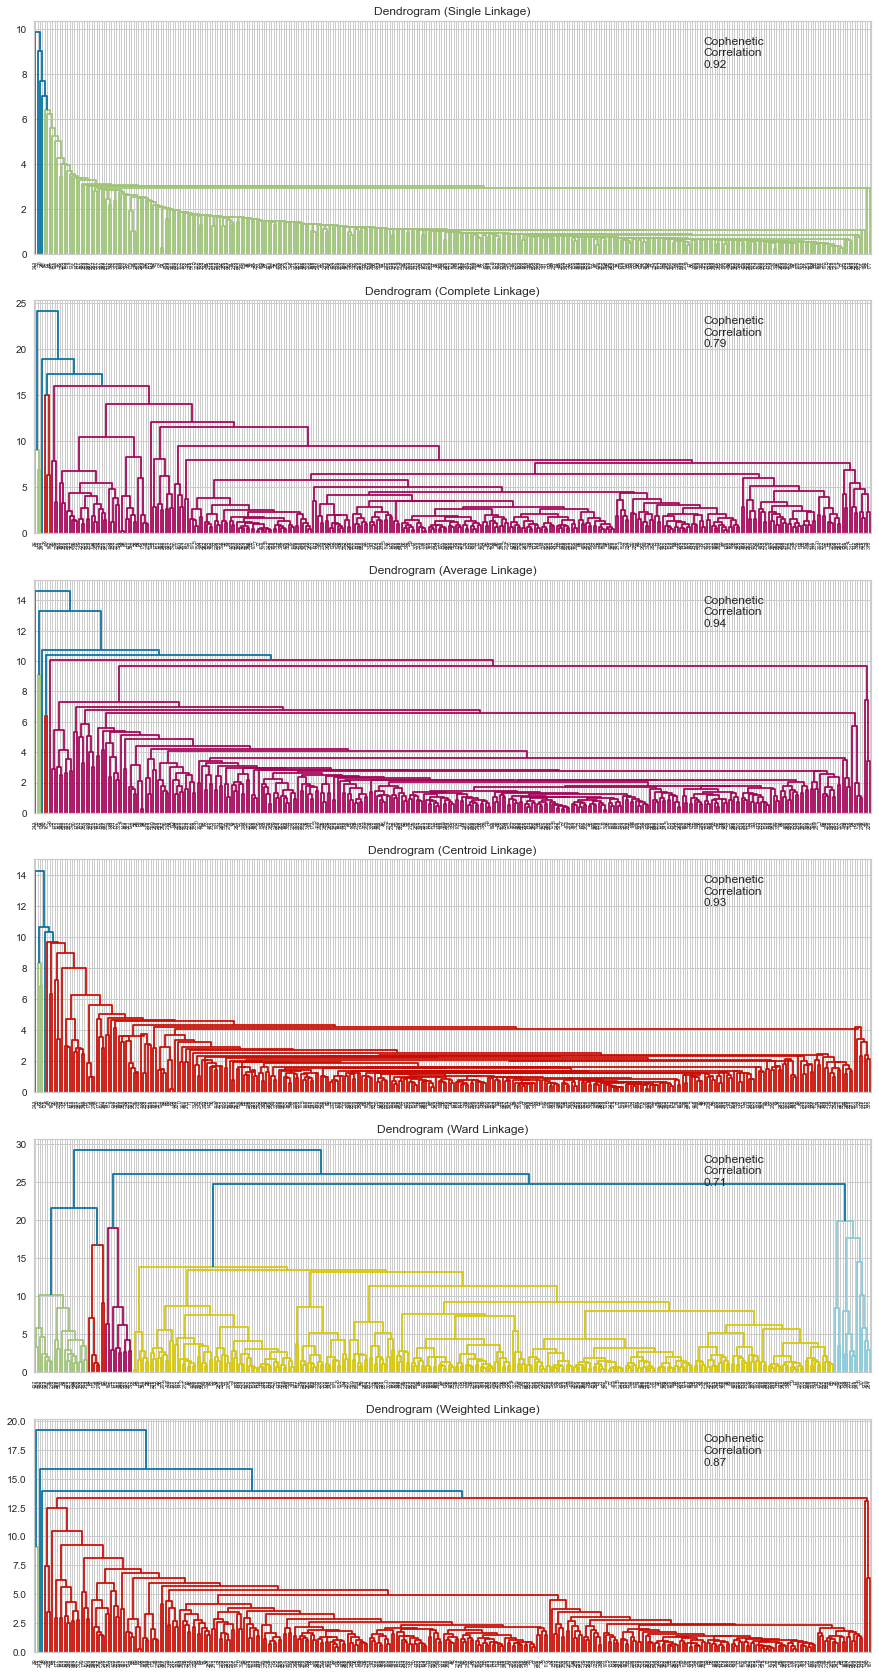

In [80]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

### Observations

The cophenetic correlation is highest for average followed by centroid linkage methods.
We will move ahead with average linkage.
7 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [81]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


In [83]:
from sklearn.cluster import AgglomerativeClustering
## code to define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")  
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [84]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiles

In [85]:
##code to groupby the cluster labels
hc_cluster_profile = df2.groupby("HC_segments").mean()  
## code to groupby the cluster labels
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  
)
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [86]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [87]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

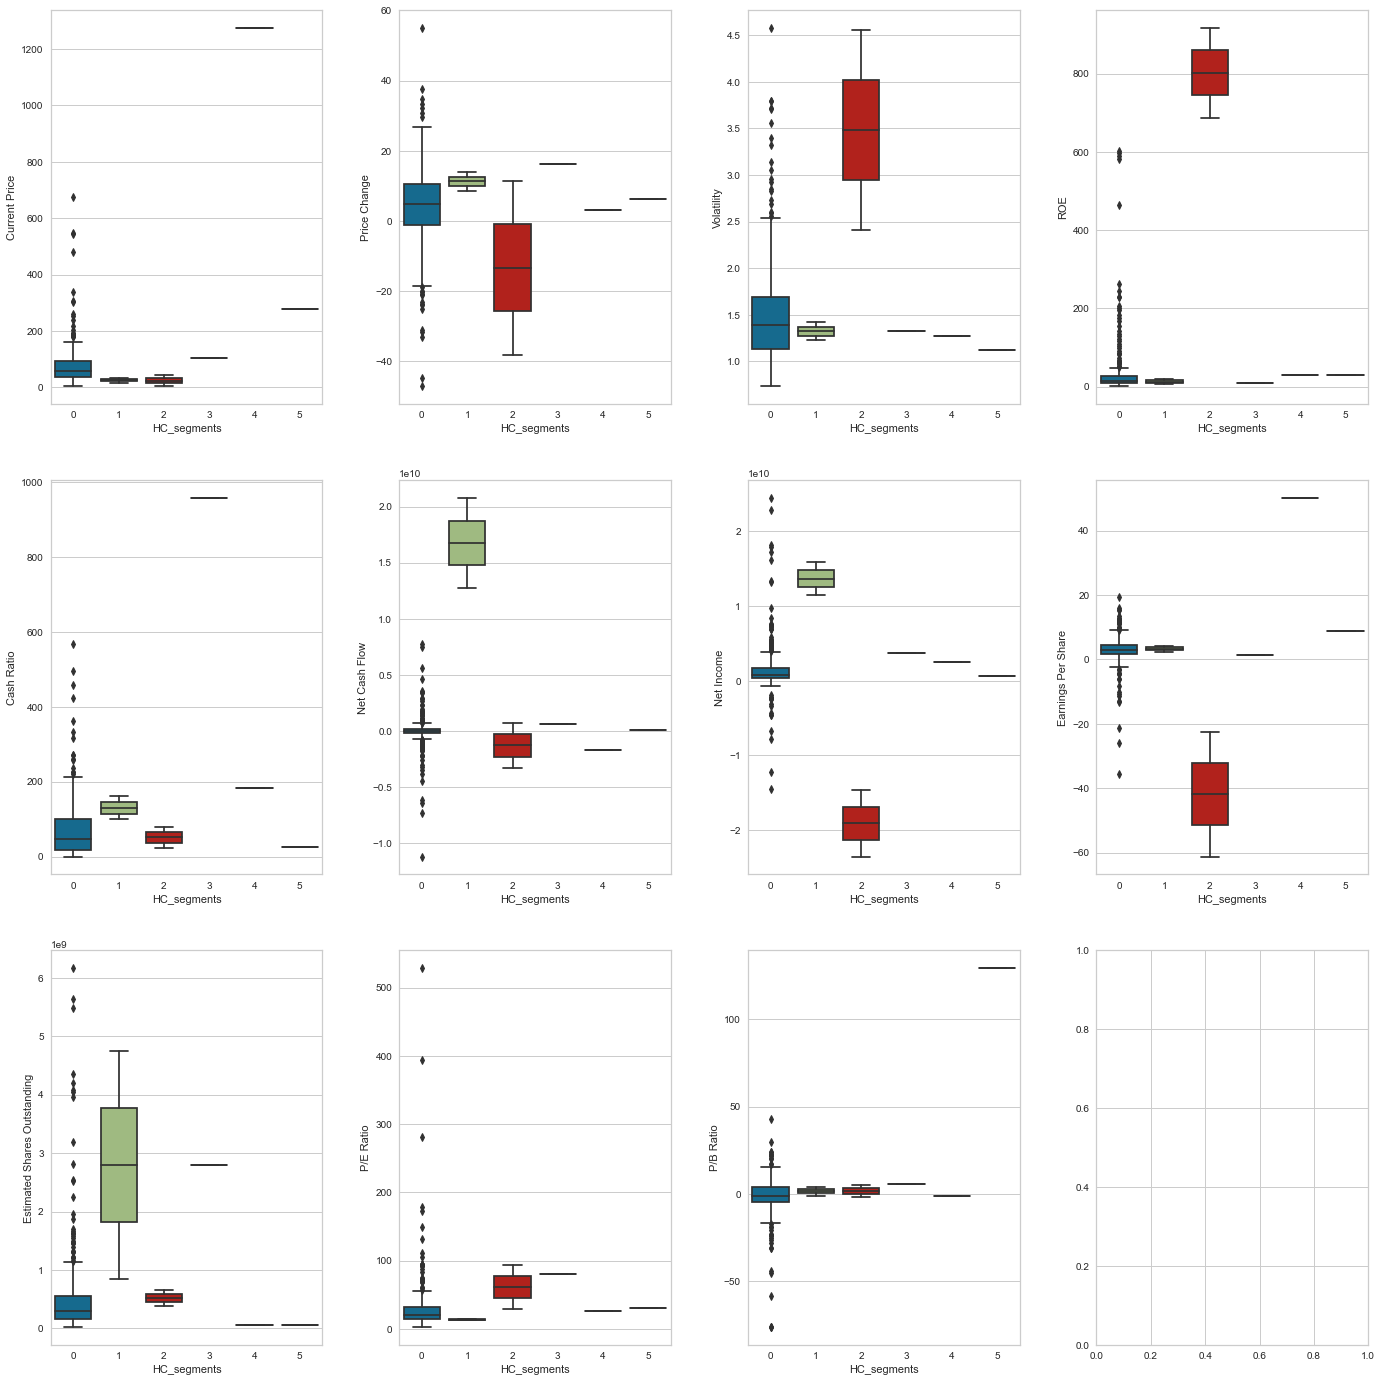

In [88]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

We see that there are 3 clusters of one company, 2 clusters of two companies, 1 cluster of 3 companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.

Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [89]:
## code to define the hierarchical clustering model
HCmodel_wardlinkage = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")  
HCmodel_wardlinkage.fit(hc_df)

# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel_wardlinkage.labels_
df3["HC_segments"] = HCmodel_wardlinkage.labels_

In [90]:
##code to groupby the cluster labels
hc_cluster_profile = df3.groupby("HC_segments").mean()  

In [91]:
## code to groupby the cluster labels
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Security"].count().values  
)

In [92]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,23
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


In [93]:
## Complete the code to print the companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 

Now the clusters seem to have more variability.

In [94]:
df3.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          2
             Health Care                     1
             Information Technology          1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          3
             Consumer Staples                1
             Financials                      1
             Health Care                     7
             Information Technology          8
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         33
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health

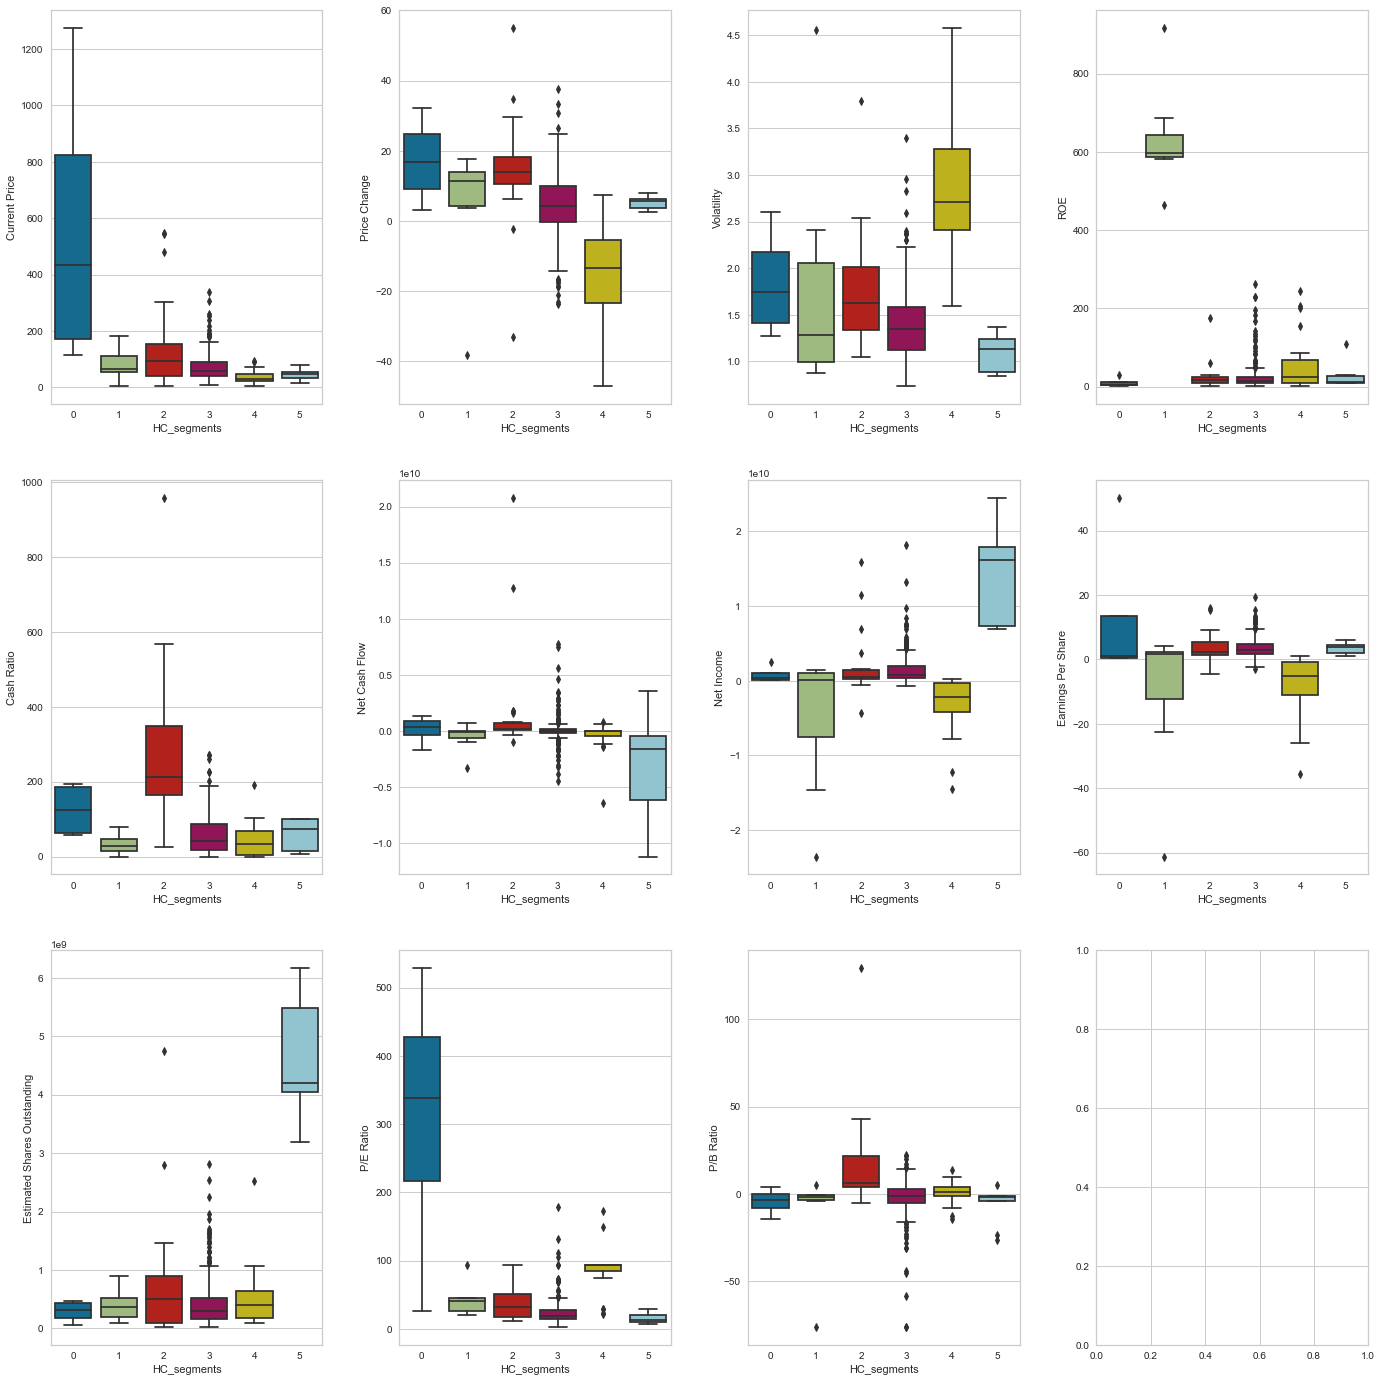

In [95]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df3,
                y=df3.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

We will look into clusters 0, 1, 4, 5 only because the other clusters have only <10 companies in them.

#### Cluster 0:

The number of companies present in this cluster is the second highest in terms of count, companies are almost uniformly divided acriss mutiple economic sectors
Average current stock prices are second highest in this cluster compared with other clusters
Avg. price change is also the highest in this cluster compared with other ones
volatilty is moderate in this cluster
Return of Equity (ROE) is moderate in this cluster with many high end outliers
Avg. cash ratio is the highest in this cluster with some high end outliers
Net cash flow is the second highest in this cluster with few high outliers
Net Income in this cluster is moderate
Avg. Earnings Per Share is the second highest in this cluster
Avg. Estimated Shares Outstanding is second highest in this cluster
P/E Ratio is the moderate to high in this cluster
P/B Ratio is the lowest to moderate in this cluster

#### Cluster 1:  

1. The number of companies present in this cluster is the third highest in terms of count, companies are almost uniformly divided acriss mutiple economic sectors
2. current stock price has the highest value in this cluster, primarily driven by outliers
3. Price change is from lowest in this cluster
4. Avg. volatilty is third highest in this cluster
5. Return of Equity (ROE) is the lowest in this cluster
6. Avg. cash ratio is the second highest in this cluster
7. Net cash flow is the highest in this cluster
8. Avg. Net Income is low to moderate in this cluster
9. Earnings Per Share is the maximum in this cluster, primarly driven by outliers
10. Estimated Shares Outstanding is moderate in this cluster
11. P/E Ratio is moderate in this cluster with a few high end outliers
12. P/B Ratio is the highest in this cluster with a few high end outliers

#### Cluster 4:

1. The number of companies present in this cluster is the fourth highest in terms of count, companies are almost uniformly divided acriss mutiple economic sectors
2. current stock price has the lowest value in this cluster
3. Price change is also the lowest in this cluster
4. Avg. volatilty is highest in this cluster
5. Return of Equity (ROE) is moderate in this cluster
6. Avg. cash ratio is low to moderate in this cluster
7. Net cash flow is the lowest in this cluster
8. Avg. Net Income is lowest in this cluster
9. Avg. Earnings Per Share is lowest in this cluster
10. Estimated Shares Outstanding is moderate in this cluster
11. Avg. P/E Ratio is highest in this cluster with a few high end outliers, suggesting that the stock is overvalued for some of these companies
12. P/B Ratio is the moderate in this cluster with a few high end and low end outliers

#### Cluster 5:

1. The number of companies present in this cluster is the highest in terms of count, companies are almost uniformly divided acriss mutiple economic sectors with some sectors like financials occupying more data points
2. current stock price is moderate in this cluster, with many high end outliers
3. Price change is moderate in this cluster
4. Volatilty is low to moderate in this cluster
5. Return of Equity (ROE) is the low to moderate in this cluster cash ratio is low to moderate in this cluster
6. Net cash flow is low to moderate in this cluster
7. Net Income is close to moderate in this cluster
8. Earnings Per Share is close to moderate in this cluster
9. Estimated Shares Outstanding is moderate in this cluster
10. P/E Ratio is low to moderate in this cluster with a few high end outliers
11. P/E Ratio is low to moderate in this cluster with a few high end and low enf outliers
12. Cluster 2 has the highest ROE, and the companies in this cluster are more effective at generating profit from its existing assets
13. The following companies are more efficient at generating income and growth from its equity financing - 'Allegion' 'Apache Corporation' 'Chesapeake Energy' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark' 'S&P Global, Inc.'

Cluster 3 has the highest net income and more number of outstanding shares

The following companies are in this cluster - 'Citigroup Inc.' 'Ford Motor' 'JPMorgan Chase & Co.' 'Coca Cola Company' 'Pfizer Inc.' 'AT&T Inc' 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.'

## K-means vs Hierarchical Clustering
1. K-means clustering technique took less time for execution (<2 secs) when compared with Hierarchical/Dendrogram clustering technique (56 secs)
2. Hierarchical clustering gave more distinct clusters when compared with K-means clustering technique
3. Cluster 2 from K-means and Cluster 4 from Hierarchical (using Ward linkage) are somewhat similar (P/E ratio and volatility have maximum values in these clusters - suggesting that the stock is overvalued generally), they have 27 and 22 observations in them respectively
4. Cluster 1 from K-means and Cluster 3 from Hierarchial (using ward linkage) are almost similar as they have similar company profiles (Net Income & Total #of outstanding shares), they have 11 and 7 observations in them respectively
5. We got 4 and 6 appropriate clusters from K-means and Hierarchial (using ward linkage) clustering techniques

<b>By looking at cluster variablity -> we should use Hierarchial clustering technique in order to analyze different categories of stock and their characteristics<b>

## Actionable Insights and Recommendations

Cluster 0: The companies in this cluster have good cash ratio, indicating that they have excess cash even after paying off its current liabilites. And the price change is positive for the companies in this cluster, indicating that stock price is growing . However, on the other hand the P/B ratio is negative indicating that some of the companies in this cluster have negative book value meaning companies have more liabilities than total assests - So further investigation needs to be done to understand this cluster in a better way.

Cluster 1: This cluster has the company with maximum Earnings per share, maximum current price, and maximum Net Cash Flow probably driven by outliers. And this cluster also has the maximum P/B ratio, indicating that the stocks are overvalued. So, there could be a potential decline to the stocks in this cluster and the negative price change and mod to high volatility indicates the fickleness of stocks present in this cluster

Cluster 4: This cluster has the company with maximum P/E ratio,maximum volatility and lowest price change indicating that the stock prices of companies in this cluster are high relative to their earnings and potentially suggesting that the stocks in this cluster are overvalued.

Cluster 2 has the highest ROE, and the companies in this cluster are more effective at generating profit from its existing assets

Cluster 3 has the highest net income and more number of outstanding shares, on the other hand it also has the lowest P/E ratio indicating that current investors are paying less per dollar of a company's overall earnings. So the stocks in these cluster are good for business and potential investors